In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("./preprocessed_data/INSEE_deces_2010_2019.pkl")

In [3]:
df = df[df['date_deces']>='2010-01-01']

To reduce further the dataset, we aggregate here by `weeknumber` rather than exact date.

In [5]:
df = df.groupby(["year","weeknumber", "age_bin", "sexe", "departement_deces"], as_index=False)["nb_deces"].sum()

In [6]:
df.head()

,year,weeknumber,age_bin,sexe,departement_deces,nb_deces
0,2010,1,1,1,01,0
1,2010,1,1,1,02,0
2,2010,1,1,1,03,1
3,2010,1,1,1,04,0
4,2010,1,1,1,05,1


In [7]:
df['nb_deces'] = df['nb_deces'].astype('float') # matplotlib struggles with pandas int

Groupby even further

In [11]:
df_nat = df.groupby(["year","weeknumber"], as_index=False)["nb_deces"].sum()

In [12]:
# Weeknumber 1, 52, 53 are noisy (why?) so I remove them for this plot
df_nat = df_nat[(df_nat.weeknumber>1) & (df_nat.weeknumber<52)] 

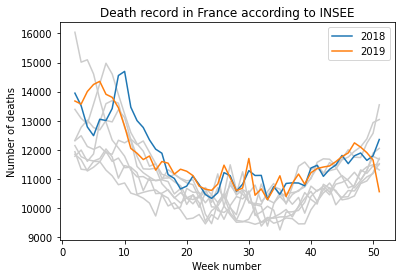

In [19]:
ax = plt.subplot(1,1,1)
for y in np.arange(2010,2018):
    ax.plot(df_nat.weeknumber[df_nat.year==y], df_nat.nb_deces[df_nat.year==y].astype('float'), '-', color="0.8");
p2, = ax.plot(df_nat.weeknumber[df_nat.year==2018], df_nat.nb_deces[df_nat.year==2018].astype('float'), '-', label="2018");
p3, = ax.plot(df_nat.weeknumber[df_nat.year==2019], df_nat.nb_deces[df_nat.year==2019].astype('float'), '-', label="2019");
ax.legend()
plt.title("Death records in France according to INSEE")
plt.xlabel("Week number")
plt.ylabel("Number of deaths")
plt.show()